# Α. Τα Στοιχεία της  Ομάδας είναι:<em> Dataset 1ο "Heart Disease Prediction"(Task Force 1)</em>

Ονοματεπώνυμο | Αριθμός Μητρώου
------------ | -------------
Μάριος Αλέξανδρος Μορφόπουλος  | 1058102
Κωνσταντίνος Μωραγέμος | 1059583
Γεωργία Μαρία Φωτοπούλου | 1059597

# Οι βιβλιοθήκες που θα χρησιμοποιήσουμε είναι οι ακόλουθες:


In [30]:
import numpy  as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Β. Εισαγωγή του dataset

    1.Το dataset "Heart Disease Prediction"(Task Force 1) περιλαμβάνει 14 στήλες με δείγματα απο χαρακτηριστικα ασθενών.
    2.Το πεδίο "στόχος" αναφέρεται στην παρουσία καρδιακής νόσου στον αντίστοιχο ασθενή.(0 για καμία παρουσία,1 για παρουσία)
    3.Οπότε καταλαβαίνουμε ότι είναι πρόβλημα "binary classification" και θα πρέπει να δημιουργήσουμε μοντέλα που να προβλέπουν με ακρίβεια την πιθανότητα καρδιακής νόσου.
        
     Πληροφορίες για τα features του dataset:
        
    * age
    * sex
    * chest pain type (4 values)
    * resting blood pressure
    * serum cholestoral in mg/dl
    * fasting blood sugar > 120 mg/dl
    * resting electrocardiographic results (values 0,1,2)
    * maximum heart rate achieved
    * exercise induced angina
    * oldpeak = ST depression induced by exercise relative to rest
    * the slope of the peak exercise ST segment
    * number of major vessels (0-3) colored by flourosopy
    * thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    * target:0 for no presence of heart disease, 1 for presence of heart disease
    

**Διάβασμα του dataset**

In [31]:
df = pd.read_csv('Dataset1.csv')

In [32]:
df.head()#Δείχνουμε τις  5 πρώτες σειρές του dataset

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

# Γ. Ανάλυση των δεδομένων, επεξεργασία και αναπαράσταση τιμών.

In [33]:
df.info()#Ανάλυση των  τύπων των feautures

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Παρατηρούμε ότι στο dataset δεν υπάρχουν ελλιπείς τιμές**

In [34]:
df.isna().sum()#Εντολή για να δούμε αν έχουμε missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [35]:
df.describe().transpose()#Τελική ανάλυση του dataset

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
target    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

**Barplot που δείχνει το πλήθος ανα target**

<AxesSubplot:xlabel='target', ylabel='count'>

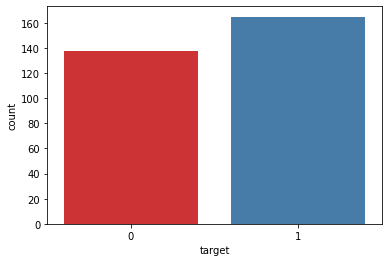

In [36]:
sns.countplot(x='target',data=df,palette="Set1")#Εντολή της Βιβλιοθήκης Seaborn που δείχνει το πλήθος του target.

**Pairplot που δείχνει την σχέση ανάμεσα στa age,trestbps,chol,thalach και target**

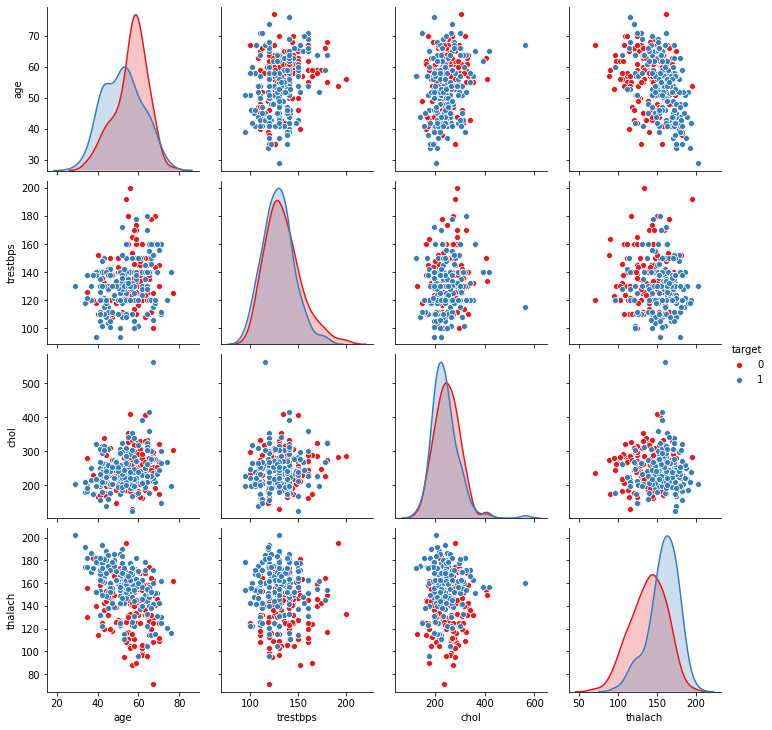

In [37]:
sns.pairplot(df[['age','trestbps','chol','thalach','target']],hue='target',palette="Set1")#Αντίστοιχη εντολή απλά εδώ δείχνουμε την σχέση ανάμεσα στα features και το label μας.

**Heatmap που δείχνει την συσχέτιση μεταξύ των στηλών του dataset μας.**

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,linewidths=.7)#Εντολή που δείχνει την συσχέτιση των features/label.

<AxesSubplot:>

**Παρατηρούμε από την εκφώνηση ότι το dataset δεν είναι ισορροπημένο οπότε θα κάνουμε υποδειγματοληψία**

In [39]:
df['target'].value_counts()#Μετράμε πόσα 0/1 έχει το label μας.

1    165
0    138
Name: target, dtype: int64

In [40]:
X = df.loc[:, df.columns != 'target']#Ορίζω ως Χ τις στήλες χωρις το target.
y = df.loc[:,'target']#Ορίζω ως y να έχει μόνο το target.

In [41]:
X.shape#Μέγεθος του Χ---> 303 γραμμές , 13 στήλες


(303, 13)

In [42]:
from imblearn.under_sampling import RandomUnderSampler
X, y = RandomUnderSampler().fit_resample(X, y)#Υποδειγματοληψία.

In [43]:
X.shape#Μετά την υποδειγματοληψία Ανανεωμένο το Χ.

(276, 13)

In [44]:
y.shape#Μετά την υποδειγματοληψία Ανανεωμένο το y.

(276,)

# Δ. Machine Learning για τους ακόλουθους αλγορίθμους KNN,SVM,LogisticRegression και MLP νευρωνικό με χρήση του Pipeline της βιβλιοθήκης imblearn 
## GridSearchCV της sklearn | Scalers θα χρησιμοποιήσουμε τον Standard Scaler.
##  Feature Selector τον Variance Threshold| Feature Extraction τον PCA


In [45]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import time
#ΜΕ ΤΙΣ ΠΑΡΑΠΑΝΩ ΕΝΤΟΛΕΣ ΟΡΙΖΩ ΤΙΣ ΒΙΒΛΙΟΘΗΚΕΣ ΠΟΥ ΘΑ ΧΡΗΣΙΜΟΠΟΙΗΣΩ.

**KNN --> MINMAXSCALER VARIANCETHRESHOLD**

In [17]:
scaler = MinMaxScaler()#Καλώ τον MinMaxScaler και τον ορίζω ως Scaler 
selector = VarianceThreshold()#Καλώ τον VarianceThreshold 
pca = PCA()

#Καλώ τον αλγόριθμο KNN
knn = KNeighborsClassifier(n_jobs=-1)
knn_name = 'knn'#Θέτω όνομα στην τοπική μεταβλητή 

#Ορίζω το Pipe του KNN 
pipe_knn = Pipeline(steps=[('scaler', scaler), ('selector', selector), ('pca', pca), (knn_name, knn)], memory = 'tmp')


parameters_knn = {  
                'selector__threshold' : [0, 1e-2, 3e-2, 4e-2, 5e-2,6e-2,7e-2,8e-2,9e-2],
                'pca__n_components'   : [None, 0.95, 0.96, 0.97, 0.98, 0.99],
                f'{knn_name}__n_neighbors'    : list(range(1, 50, 2)),
                f'{knn_name}__metric'         : ('manhattan', 'euclidean', 'chebyshev', 'minkowski'),
                f'{knn_name}__weights'        : ('uniform', 'distance')
             }


start_time = time.time()


clf_micro = GridSearchCV(pipe_knn, parameters_knn, scoring='f1_micro', cv=5, n_jobs=-1,verbose=1)
clf_micro.fit(X,y)
print(clf_micro.best_estimator_)
print(clf_micro.best_params_)
print('accuracy =', round(clf_micro.best_score_*100,2),'%')

print(str(round(time.time() - start_time,2))+' sec')

Fitting 5 folds for each of 10800 candidates, totalling 54000 fits
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('selector', VarianceThreshold(threshold=0.03)),
                ('pca', PCA(n_components=0.97)),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_jobs=-1,
                                      weights='distance'))])
{'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__weights': 'distance', 'pca__n_components': 0.97, 'selector__threshold': 0.03}
accuracy = 85.87 %
625.83 sec


**KNN --> STANDARDSCALER**

In [18]:
scaler = StandardScaler()
pca = PCA()


knn = KNeighborsClassifier(n_jobs=-1)
knn_name = 'knn'


pipe_knn = Pipeline(steps=[('scaler', scaler), ('pca', pca), (knn_name, knn)], memory = 'tmp')

parameters_knn = {  
                'pca__n_components'   : [None, 0.95, 0.96, 0.97, 0.98, 0.99],
                f'{knn_name}__n_neighbors'    : list(range(1, 50, 2)),
                f'{knn_name}__metric'         : ('manhattan', 'euclidean', 'chebyshev', 'minkowski'),
                f'{knn_name}__weights'        : ('uniform', 'distance')
             }


start_time = time.time()


clf_micro = GridSearchCV(pipe_knn, parameters_knn, scoring='f1_micro', cv=5, n_jobs=-1,verbose=1)
clf_micro.fit(X,y)
print(clf_micro.best_estimator_)
print(clf_micro.best_params_)
print('accuracy =', round(clf_micro.best_score_*100,2),'%')

print(str(round(time.time() - start_time,2))+' sec')

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_jobs=-1,
                                      n_neighbors=11, weights='distance'))])
{'knn__metric': 'euclidean', 'knn__n_neighbors': 11, 'knn__weights': 'distance', 'pca__n_components': 0.95}
accuracy = 84.43 %
56.1 sec


**SVM --> MINMAXSCALER VARIANCETHRESHOLD**

In [19]:
scaler = MinMaxScaler()
selector = VarianceThreshold()
pca = PCA()

svm = SVC()
svm_name = 'svm'


pipe_svm = Pipeline(steps=[('scaler', scaler), ('selector', selector), ('pca', pca), (svm_name, svm)], 
                    memory = 'tmp')

parameters_svm = {  
                'selector__threshold' : [0, 1e-2, 3e-2, 4e-2, 5e-2,6e-2,7e-2,8e-2,9e-2],
                'pca__n_components'   : [None, 0.95, 0.96, 0.97, 0.98, 0.99],
                f'{svm_name}__C'      : [0.01, 0.1, 0.5, 1, 10, 100],
                f'{svm_name}__gamma'  : ['auto','scale',1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
                f'{svm_name}__kernel' : ['rbf', 'poly', 'linear','sigmoid']
             }


start_time = time.time()


clf_micro = GridSearchCV(pipe_svm, parameters_svm , scoring='f1_micro', cv=5, n_jobs=-1, verbose=1)
clf_micro.fit(X,y)
print(clf_micro.best_estimator_)
print(clf_micro.best_params_)
print('accuracy =', round(clf_micro.best_score_*100,2),'%')

print(str(round(time.time() - start_time,2))+' sec')



Fitting 5 folds for each of 11664 candidates, totalling 58320 fits
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('selector', VarianceThreshold(threshold=0.03)),
                ('pca', PCA(n_components=0.95)),
                ('svm', SVC(C=10, gamma=0.75, kernel='poly'))])
{'pca__n_components': 0.95, 'selector__threshold': 0.03, 'svm__C': 10, 'svm__gamma': 0.75, 'svm__kernel': 'poly'}
accuracy = 86.61 %
549.86 sec


**SVM --> STANDARDSCALER**

In [20]:
scaler = StandardScaler()
pca = PCA()

svm = SVC()
svm_name = 'svm'


pipe_svm = Pipeline(steps=[('scaler', scaler), ('pca', pca), (svm_name, svm)], 
                    memory = 'tmp')

parameters_svm = {  
                'pca__n_components'   : [None, 0.95, 0.96, 0.97, 0.98, 0.99],
                f'{svm_name}__C'      : [0.01, 0.1, 0.5, 1, 10, 100],
                f'{svm_name}__gamma'  : ['auto','scale',1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
                f'{svm_name}__kernel' : ['rbf', 'poly', 'linear','sigmoid']
             }

 

start_time = time.time()


clf_micro = GridSearchCV(pipe_svm, parameters_svm , scoring='f1_micro', cv=5, n_jobs=-1, verbose=1)
clf_micro.fit(X,y)
print(clf_micro.best_estimator_)
print(clf_micro.best_params_)
print('accuracy =', round(clf_micro.best_score_*100,2),'%')

print(str(round(time.time() - start_time,2))+' sec')


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('svm', SVC(C=0.1, gamma='auto', kernel='linear'))])
{'pca__n_components': None, 'svm__C': 0.1, 'svm__gamma': 'auto', 'svm__kernel': 'linear'}
accuracy = 84.43 %
65.47 sec


**MLP --> STANDARDSCALER**

In [25]:
scaler = StandardScaler()
pca = PCA()

mlp = MLPClassifier(random_state=1,max_iter=1500)
mlp_name = 'mlp'

pipe_mlp = Pipeline(steps=[('scaler', scaler), ('pca', pca), (mlp_name, mlp)], 
                    memory = 'tmp')

parameters_mlp = {  
                'pca__n_components'   : [None, 0.95, 0.96, 0.97, 0.98, 0.99],
                #f'{mlp_name}__hidden_layer_sizes':[20,50,100,150,200,250],
                f'{mlp_name}__activation'      : ['identity', 'logistic', 'tanh', 'relu'],
                f'{mlp_name}__solver'  : ['sgd', 'adam', 'lbfgs'],
                f'{mlp_name}__learning_rate' : ['constant', 'invscaling', 'adaptive'],
                f'{mlp_name}__alpha' : [1e-2, 1e-1,1e-3,1e-4],
                #f'{mlp_name}__max_iter' : [100,250,500,750,1000,1250,1500,2000]
             }

start_time = time.time()


clf_micro = GridSearchCV(pipe_mlp, parameters_mlp , scoring='f1_micro', cv=5, n_jobs=-1, verbose=1)
clf_micro.fit(X,y)
print(clf_micro.best_estimator_)
print(clf_micro.best_params_)
print('accuracy =', round(clf_micro.best_score_*100,2),'%')

print(str(round(time.time() - start_time,2))+' sec')



Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('mlp',
                 MLPClassifier(activation='logistic', alpha=0.01, max_iter=1500,
                               random_state=1, solver='sgd'))])
{'mlp__activation': 'logistic', 'mlp__alpha': 0.01, 'mlp__learning_rate': 'constant', 'mlp__solver': 'sgd', 'pca__n_components': 0.95}
accuracy = 85.16 %
1125.59 sec


**MLP --> MINMAXSCALER**

In [ ]:
scaler = MinMaxScaler()
selector = VarianceThreshold()
pca = PCA()

mlp = MLPClassifier(random_state=1,max_iter=1500)
mlp_name = 'mlp'

pipe_mlp = Pipeline(steps=[('scaler', scaler), ('selector', selector), ('pca', pca), (mlp_name, mlp)], 
                    memory = 'tmp')


parameters_mlp = {  
                'pca__n_components'   : [None, 0.95, 0.96, 0.97, 0.98, 0.99],
                'selector__threshold' : [0, 1e-2, 3e-2, 4e-2, 5e-2,6e-2],
                f'{mlp_name}__activation'      : ['identity', 'logistic', 'tanh', 'relu'],
                f'{mlp_name}__solver'  : ['sgd', 'adam', 'lbfgs'],
                f'{mlp_name}__learning_rate' : ['constant', 'invscaling', 'adaptive'],
                f'{mlp_name}__alpha' : [1e-2, 1e-1,1e-3,1e-4],
             }

start_time = time.time()


clf_micro = GridSearchCV(pipe_mlp, parameters_mlp , scoring='f1_micro', cv=5, n_jobs=-1, verbose=1)
clf_micro.fit(X,y)
print(clf_micro.best_estimator_)
print(clf_micro.best_params_)
print('accuracy =', round(clf_micro.best_score_*100,2),'%')

print(str(round(time.time() - start_time,2))+' sec')



Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


# **E.Logistic Regression με χρήση PCA και StandardScaler **

In [47]:
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
logistic_name = 'logistic'


pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), (logistic_name, logistic)],
               memory = 'tmp')


# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": list(range(1,X.shape[1]+1,1)),
    "logistic__C": np.logspace(-4, 4, 50),
    
}

start_time = time.time()

clf_micro = GridSearchCV(pipe, param_grid , scoring='f1_micro', cv=5, n_jobs=-1, verbose=1)
clf_micro.fit(X,y)
print(clf_micro.best_estimator_)
print(clf_micro.best_params_)
print('accuracy =', round(clf_micro.best_score_*100,2),'%')

print(str(round(time.time() - start_time,2))+' sec')





Fitting 5 folds for each of 650 candidates, totalling 3250 fits
Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=4)),
                ('logistic',
                 LogisticRegression(C=0.8286427728546842, max_iter=10000,
                                    tol=0.1))])
{'logistic__C': 0.8286427728546842, 'pca__n_components': 4}
accuracy = 83.69 %
30.45 sec
